<a href="https://colab.research.google.com/github/binnurozcan/data_preprocessing/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [210]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from google.colab import drive

In [212]:
drive.mount('/gdrive', force_remount=True)
data = pd.read_csv("/gdrive/MyDrive/NLP/reviews.csv")

Mounted at /gdrive


In [215]:
data.head()

,Unnamed: 0,0
0,0,I very rarely write a bad review but when you ...
1,1,For the view I’d give Aqua @ The Shard 5 out o...
2,2,We had the 5 course tasting and wine pairing m...
3,3,We 2 sisters went to Aqua Shard for brunch at ...
4,4,"Wonderful experience and food. 3 courses, all ..."


Gereksiz kolonun düşürülmesi.


In [216]:
data.drop(labels=[data.columns[0]], axis=1, inplace=True)

Kolon isimlendirme.


In [217]:
data.rename(columns={'0': 'reviews'}, inplace=True)
data.head()

,reviews
0,I very rarely write a bad review but when you ...
1,For the view I’d give Aqua @ The Shard 5 out o...
2,We had the 5 course tasting and wine pairing m...
3,We 2 sisters went to Aqua Shard for brunch at ...
4,"Wonderful experience and food. 3 courses, all ..."


1. Eksik veri kontrolü

In [218]:
data.isnull().sum()

reviews    0
dtype: int64

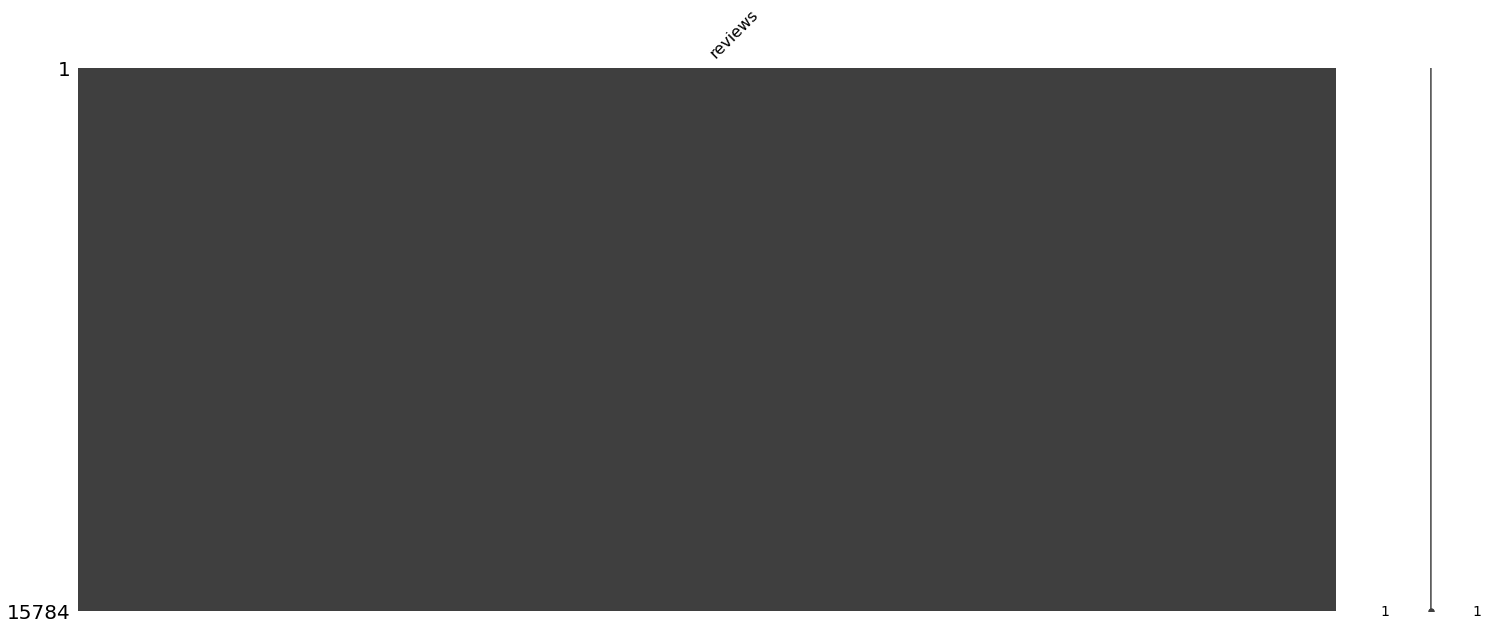

In [219]:
import missingno as msno
msno.matrix(data)

Review uzunlukları.

In [220]:
def length(reviews):    
    return len(reviews)
data['length'] = data['reviews'].apply(length)
data.head(10)

,reviews,length
0,I very rarely write a bad review but when you ...,708
1,For the view I’d give Aqua @ The Shard 5 out o...,1235
2,We had the 5 course tasting and wine pairing m...,588
3,We 2 sisters went to Aqua Shard for brunch at ...,1474
4,"Wonderful experience and food. 3 courses, all ...",175
5,"Amazing restaurant, and very helpful staff had...",100
6,Rarely can I be bothered to leave a review but...,794
7,Mediocre afternoon tea experience. Very little...,301
8,We arrived 30 minutes early for our table book...,1190
9,Amazing views well worth the price of350 plus ...,204


In [221]:
data.drop(labels=[data.columns[1]], axis=1, inplace=True)



2. Küçük harf dönüşümü. (Normalization)


In [222]:
data['reviews'] = data['reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data.head()

,reviews
0,i very rarely write a bad review but when you ...
1,for the view i’d give aqua @ the shard 5 out o...
2,we had the 5 course tasting and wine pairing m...
3,we 2 sisters went to aqua shard for brunch at ...
4,"wonderful experience and food. 3 courses, all ..."


3. Noktalama işareti, emoji ve sayıların çıkarılması. (Removing punctuation)

In [223]:
data.iloc[3]['reviews']

'we 2 sisters went to aqua shard for brunch at 2pm on a saturday. we were shown to our table and provided with 2 menus. after 20 mins our waiter returned to take our menu choices for all 3 courses. the starter arrived and was...egg benedict and waffles. the waffles starter was a decent size but the egg benedict was on the small size. half a muffin, 1 egg, square of ham and some sauce. we waited quite a long time for pork rib eye (very small serving) and beef. we had watched all of the beef requests being carried through and each plate had a large yorkshire pudding on. my plate didn’t have one. i asked a passing waiter if i should have had one and he laughed and said it had “flown away”. he brought one on a separate plate but by the time he brought it all my food was cold. our waiter asked if we wanted tea or coffee but we said we hadn’t had dessert and he said “let me check”. he arrived with cutlery and i asked for a port to go with my cheese choice. i waited and waited - we asked anot

In [224]:
data['reviews'] = data['reviews'].str.replace('[^A-Za-z0-9]+',' ', regex=True)
data['reviews'] = data['reviews'].str.replace('\d','')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [225]:
import re
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emotions
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
data['reviews'] = data['reviews'].apply(lambda x: remove_emoji(x))


In [226]:
data.iloc[3]['reviews']

'we  sisters went to aqua shard for brunch at pm on a saturday we were shown to our table and provided with  menus after  mins our waiter returned to take our menu choices for all  courses the starter arrived and was egg benedict and waffles the waffles starter was a decent size but the egg benedict was on the small size half a muffin  egg square of ham and some sauce we waited quite a long time for pork rib eye very small serving and beef we had watched all of the beef requests being carried through and each plate had a large yorkshire pudding on my plate didn t have one i asked a passing waiter if i should have had one and he laughed and said it had flown away he brought one on a separate plate but by the time he brought it all my food was cold our waiter asked if we wanted tea or coffee but we said we hadn t had dessert and he said let me check he arrived with cutlery and i asked for a port to go with my cheese choice i waited and waited we asked another waiter if he could bring it 

4. Stopwords


In [227]:
import nltk as nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

words = set(nltk.corpus.stopwords.words())
stop = stopwords.words('english')
newStopWords = ['oz','stopWord2']
stop.extend(newStopWords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [228]:
data['reviews'] = data['reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data.head()

,reviews
0,rarely write bad review pay high prices go exp...
1,view give aqua shard give food warmest food hi...
2,course tasting wine pairing menu throughly dis...
3,sisters went aqua shard brunch pm saturday sho...
4,wonderful experience food courses excellent st...


5. Lemmatization

In [229]:
nltk.download('omw-1.4')
from textblob import Word
nltk.download('wordnet')
data['reviews'] = data['reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,reviews
0,rarely write bad review pay high price go expe...
1,view give aqua shard give food warmest food hi...
2,course tasting wine pairing menu throughly dis...
3,sister went aqua shard brunch pm saturday show...
4,wonderful experience food course excellent sta...


6. Stemming

In [230]:
#from nltk.stem import PorterStemmer
#st = PorterStemmer()
#data['reviews'] = data['reviews'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
#data.head(30)

Yeni review uzunlukları.

In [231]:
data['length'] = data['reviews'].apply(length)
data.head(10)

,reviews,length
0,rarely write bad review pay high price go expe...,398
1,view give aqua shard give food warmest food hi...,672
2,course tasting wine pairing menu throughly dis...,342
3,sister went aqua shard brunch pm saturday show...,835
4,wonderful experience food course excellent sta...,130
5,amazing restaurant helpful staff wonderful exp...,77
6,rarely bothered leave review motivated poor su...,505
7,mediocre afternoon tea experience little food ...,188
8,arrived minute early table booking hoping grab...,734
9,amazing view well worth price plus meal little...,129


In [232]:
data.drop(labels=[data.columns[1]], axis=1, inplace=True)

In [233]:
data.to_csv('/gdrive/MyDrive/NLP/clean.csv')